In [27]:
%matplotlib inline

import seaborn as sns
import pandas as pd
from pysal.lib import weights, examples
import geopandas as gpd
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import warnings

In [2]:
# Loading example from pysal.lib
nyc_data = examples.load_example("NYC Socio-Demographics")

# Printing the paths to all the files in the dataset
nyc_data.get_file_list()

['C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\NYC_Tract_ACS2008_12.shx',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.dbf',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.prj',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shp',
 'C:\\Users\\Marca jest super\\AppData\\Local\\pysal\\pysal\\NYC_Socio-Demographics\\__MACOSX\\._NYC_Tract_ACS2008_12.shx']

In [3]:
# Uploading one of the example
nyc = gpd.read_file(nyc_data.get_path("NYC_Tract_ACS2008_12.shp"))

<Axes: >

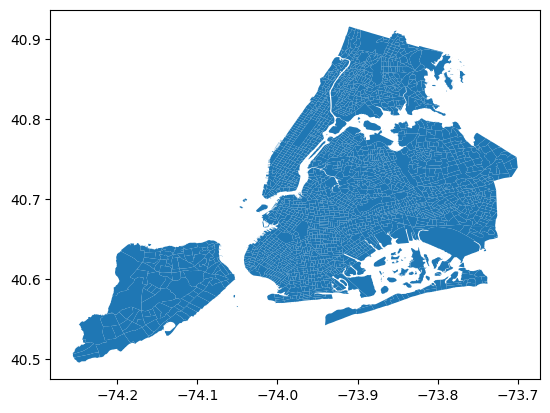

In [7]:
nyc.plot()

In [9]:
# Storing the column names with total population of ethic groups
variables = ['european','asian','american','african','hispanic','mixed','pacific']

In [10]:
# Total population summation for standardization purposes
nyc['total_groups'] = nyc[variables].sum(axis=1)
nyc['total_groups']

0           0
1        3362
2       10667
3           0
4       11569
        ...  
2161     8514
2162     3740
2163     5131
2164     1448
2165        0
Name: total_groups, Length: 2166, dtype: int64

In [11]:
# Standardising the ethnic groups total population columns
# This way, the values will range between 0 (no population of a given ethnic group)
# and 1 (all the population in the tract is of that group)
for variable in variables:
    column_name = f'{variable}_stand'
    nyc[column_name] = nyc[variable] / nyc['total_groups']


In [12]:
# Filling NaN values with 0 for further calculations
nyc = nyc.fillna(0)

In [13]:
nyc.head()

,UNEMP_RATE,cartodb_id,withssi,withsocial,withpubass,struggling,profession,popunemplo,poptot,popover18,...,geo_fips,geometry,total_groups,european_stand,asian_stand,american_stand,african_stand,hispanic_stand,mixed_stand,pacific_stand
0,0.000000,1,0,0,0,0,0,0,0,0,...,3.606140e+20,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.081705,2,228,353,47,694,0,92,2773,2351,...,3.606140e+20,"POLYGON ((-73.98450 40.70951, -73.98655 40.709...",3362,0.160619,0.371505,0.012790,0.049970,0.353064,0.052052,0.000000
2,0.170603,3,658,1577,198,2589,36,549,8339,6878,...,3.606140e+20,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",10667,0.383519,0.161620,0.000000,0.104528,0.328396,0.021937,0.000000
3,0.000000,4,0,0,0,0,0,0,0,0,...,3.606140e+20,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.088037,5,736,1382,194,2953,19,379,10760,8867,...,3.606140e+20,"POLYGON ((-73.99022 40.71440, -73.98934 40.714...",11569,0.102083,0.566082,0.004927,0.078658,0.225430,0.021696,0.001124


In [14]:
# Creating a list to store standardized columns
variables_stand = ['european_stand','asian_stand','american_stand','african_stand','hispanic_stand','mixed_stand','pacific_stand']

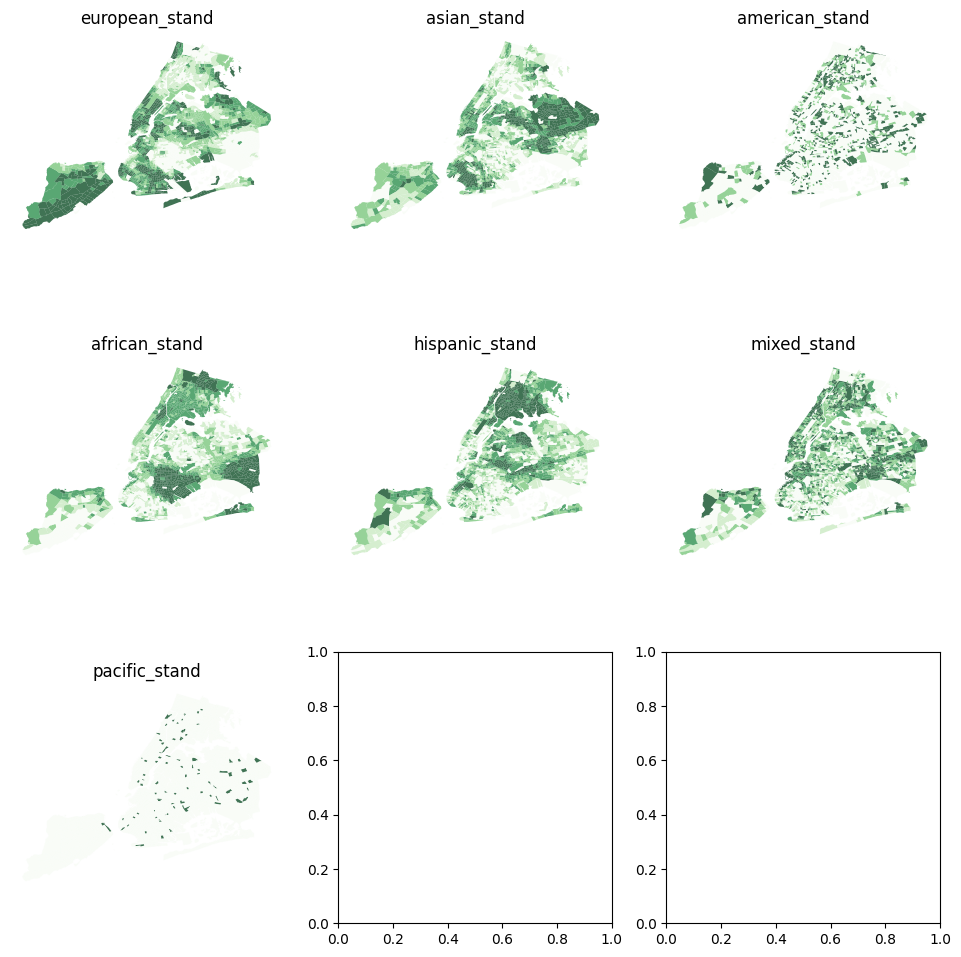

In [28]:
# Plotting standardized data
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))

# Making the axes accessible with single indexing
axs = axs.flatten()

# Removing User Warnings when creating classes
warnings.filterwarnings("ignore", category=UserWarning, message="Not enough unique values in array to form.*")

# Starting the loop over all the variables of interest
for i, col in enumerate(variables_stand):
    # selecting the axis where the map will go
    ax = axs[i]
    # Plotting the map
    nyc.plot(
        column=col,
        ax=ax,
        scheme='Quantiles',
        linewidth=0,
        cmap='Greens',
        alpha=0.75
    )
    # Removing axis clutter
    ax.set_axis_off()
    
    # Setting the axis title to the name of variable being plotted
    ax.set_title(col)

# Displaying the figure
plt.show()

In [17]:
# Setting up the object with parameters needed to run the algorithm
# Added parameters:
# number of clusters = 10,
# random state - it ensures that initialization of centroids is reproducible,
## if the same value is used in different runs of the K-means, they will have 
## the same initial centroids, leading to consistent results across multiple runs,
# n_init - number of times the K-means is run with different cetroid seeds
## (several runs are recommended for sparse high-dimensional problems).
kmeans5 = cluster.KMeans(n_clusters=10, random_state=12345, n_init=10)

In [18]:
# Running the clustering algorithm
k5cls = kmeans5.fit(nyc[variables_stand])

In [19]:
k5cls.labels_

array([7, 5, 3, ..., 9, 3, 7])

In [20]:
# Adding results to the table
nyc['k5cls'] = k5cls.labels_

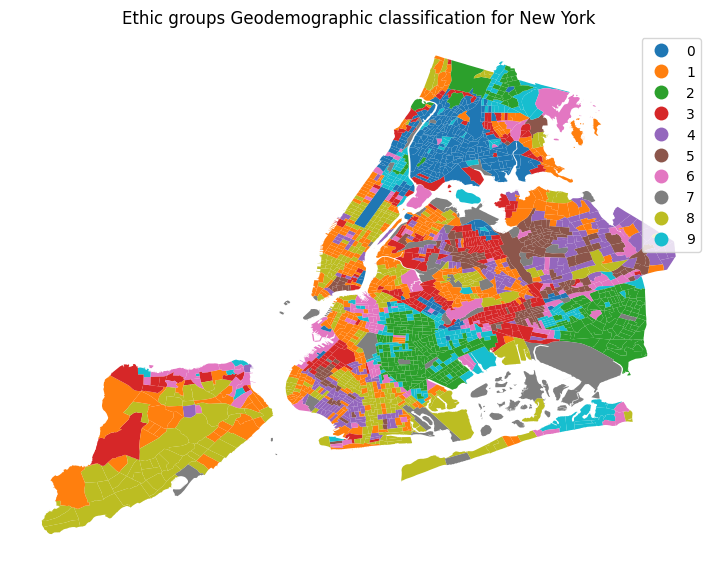

In [21]:
# Setting up the figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))

# Plotting unique values choropleth including a legend and with no boundary lines
nyc.plot(
    column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax
)

# Removing axis
ax.set_axis_off()

# Adding title
plt.title('Ethic groups Geodemographic classification for New York')

# Displaying the map
plt.show()

In [22]:
# Checking the size of each group
k5sizes = nyc.groupby('k5cls').size()
k5sizes

k5cls
0    263
1    372
2    293
3    237
4    184
5    148
6    123
7     40
8    307
9    199
dtype: int64

In [25]:
# Calculating the mean by group
k5means = nyc.groupby('k5cls')[variables].mean()

# Displaying the mean of total population for each ethnic group within the class
k5means.T

k5cls,0,1,2,3,4,5,6,7,8,9
european,918.969582,2796.626344,167.593857,1912.459916,1913.554348,911.722973,1400.373984,0.0,3530.410423,596.371859
asian,144.467681,448.833333,64.252560,595.400844,1160.119565,2226.385135,386.455285,0.0,228.710098,140.889447
american,27.566540,9.056452,6.621160,23.016878,9.798913,23.966216,18.203252,0.0,6.570033,15.693467
african,1375.893536,201.091398,2712.675768,360.413502,107.798913,225.952703,1408.252033,0.0,65.068404,2492.030151
hispanic,3227.711027,662.548387,278.197952,2249.253165,507.663043,777.425676,1097.642276,0.0,283.856678,1019.567839
mixed,203.615970,97.370968,51.040956,140.202532,76.766304,124.371622,157.821138,0.0,62.778502,135.221106
pacific,1.262357,2.067204,2.686007,2.839662,0.766304,1.662162,2.032520,0.0,0.697068,2.281407
